<a href="https://colab.research.google.com/github/chohu-boraaaa/ADsP/blob/main/5-3.%EC%9E%90%EC%9C%A8%ED%95%99%EC%8A%B5%3A%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D%EA%B3%BC%20%EC%97%B0%EA%B4%80%EA%B7%9C%EC%B9%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. 자율학습

## 1. 군집분석과 연관규칙
- 목표변수가 없는 상태에서 학습을 통해 모델을 만드는 분석기법

### 1. 자율학습
|자율학습 기법|내용|
|-------------|----|
|군집분석|데이터를 특성에 따라 군집화하고 군집으로 전체 데이터 특성 파악|
|연관규칙|대용량 데이터베이스에 발생하는 데이터를 분석하여 각 거래 간의 상호 관련성을 분석하는 방법|

### 2. 군집분석
- 객체들을 유사한 속성으로 군집하는 데이터마이닝 기법으로 계층적 방법과 비계층적 방법이 있음
- 결과변수 값을 알지 못하는 상태에서 군집을 수행하는 자율학습기법
- 각 개체 간의 유사도를 측정하여 군집 생성
- 군집은 객체 간의 거리 값을 측정하여 생성되고 거리 값은 각 개체 간의 유사도를 계산하여 생성

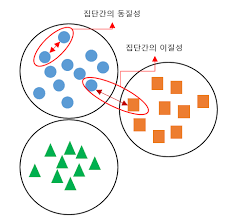

출처 : https://m.blog.naver.com/jinty/221719520925

- 위 그림처럼 각 개체들을 유사한 것으로 묶어주는 방법
- ex. 소득에 따른 기업 충성도 분석, 기업 우수고객/유입고객/신규고객 등을 군집화할 수 있음

#### 2-1. 군집분석을 위한 유사성 척도
- 군집을 묶기 위해서는 각 객체 간 유사성을 측정하여 군집을 묶어야 함
- 유사성 척도는 거리 척도와 상관계수 척도가 있음

##### ✅ 군집분석 유사성 척도
|유사성 척도|내용|
|-----------|----|
|거리 척도|- 거리 값을 생성하여 그 값을 기준으로 군집을 생성</br>- 즉, 거리 값이 가까우면 유사성이 높고 거리 값이 멀어지면 유사성이 낮아짐|
|상관계수 척도|- 객체 간에 상관계수(r)를 계산하여 유사성 결정</br>- 객체 간에 상관계수가 크면 유사성은 높아지고 상관계수가 작아지면 유사성은 낮아진다.|

#### 2-2. 거리척도를 사용한 유사성 계산기법

##### 1> 유클리디안 거리
- 유클리드라는 수학자가 만든 공식으로 n차원 공간에서 두 점 간의 거리를 계산하는 공식
- 유클리드 거리 계산법을 "L2 Distance"라고도 함
- 각 객체의 속성 값을 기준으로 각 객체 사이의 유사도를 측정

![유클리디안 거리](http://pminho0503.cafe24.com/userfiles/image/Algorithm/EuclideanDistance.gif)

출처 : http://pminho0503.cafe24.com/bbs_view.php?s=37&pseq=11&mnid=1

- R을 사용해서 유클리디안 거리를 확인하려면 먼저 메트릭스에 임의의 데이터를 삽입해야 함

In [1]:
# 유클리디안 거리 값 측정
# 1열은 소득, 2열은 충성도
data <- matrix(c(140, 50, 120, 55, 78, 80, 95, 85, 85, 90), nrow=5, ncol=2, byrow=TRUE)
data

140,50
120,55
78,80
95,85
85,90


In [2]:
# 유클리디안 거리값 계산
D1 <- dist(data)
D1

         1        2        3        4
2 20.61553                           
3 68.87670 48.87740                  
4 57.00877 39.05125 17.72005         
5 68.00735 49.49747 12.20656 11.18034

위의 예를 보면 1에서 2로 가는 거리 값은 20.61553이고 1에서 3으로 가는 거리는 68.87670

##### 2> 민코프스키 거리
- 유클리디안 거리의 일반화된 방법으로 m값이 2일 때는 유클리디안 거리와 동일

![민코프스키 거리](https://blog.kakaocdn.net/dn/bEeFPp/btqEGTJqNVl/72PdGkJLVdo5eLlW7iUId1/img.png)

출처 : https://imsosickofbeingacouchpotato.tistory.com/31

- 민코프스키 거리 값도 유클리디안 거리 값과 동일하게 dist 함수 사용

In [5]:
D2 <- dist(data, method = "minkowski", p=3)
D2

         1        2        3        4
2 20.10363                           
3 64.25807 44.76636                  
4 51.17230 34.93184 17.14297         
5 61.30254 44.09724 11.03296 10.40042

##### 3> 마할라노비스 거리
- 변수 간 상관관계가 있는 경우 사용하는 유사성 척도

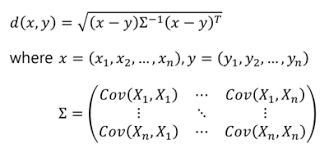

출처 : https://blog.naver.com/PostView.nhn?isHttpsRedirect=true&blogId=cjh226&logNo=220810613028&parentCategoryNo=&categoryNo=15&viewDate=&isShowPopularPosts=false&from=postView

##### 4> 맨하튼 거리
- 유클리디안 거리 계산법은 각 개체 간 거리를 계산할 때 직선으로 계산하지만 맨하튼 거리는 객체의 거리를 계산하는 경우 각 객체를 이어주는 길을 고려해서 측정하는 방법

![맨하튼 거리](https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile26.uf.tistory.com%2Fimage%2F216BDB4357542786353917)

출처 : https://rfriend.tistory.com/199

- 맨하튼 거리는 위 그림에서 가장 간단한 방법인 Route 3으로 사용

In [6]:
D3 <- dist(data, method="manhattan")
D3

   1  2  3  4
2 25         
3 92 67      
4 80 55 22   
5 95 70 17 15

##### 4> 상관계수를 사용한 유사성 계산
- 두 개의 변수 간에 상관계수를 산정하여 유사성을 산정
- 상관계수가 크면 두 객체 간 유사성 큼

###### ✅ 표본상관계수

![표본상관계수](https://wikimedia.org/api/rest_v1/media/math/render/svg/135b1f3a3a7a31a050f8b7f9325e5b14db99e37a)

출처 : https://ko.wikipedia.org/wiki/%ED%94%BC%EC%96%B4%EC%8A%A8_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98

In [7]:
# 상관계수를 사용한 유사성 계산
data2 <- matrix(c(18,6,14,20,7,15,43,4,2), nrow=3, ncol=3, byrow=TRUE)
data2

18,6,14
20,7,15
43,4,2


In [9]:
# 3행 3열에서 두 변수 간 상관계수 산정
data2[1,]
data2[2,]
cor(data2[1,], data2[2,])

[1] 18  6 14

[1] 20  7 15

[1] 0.9983375

상관계수가 크면 유사성이 크기 때문에 군집분석에서 군집의 기준으로 사용됨

### 3. 군집분석의 종류

군집분석은 사전에 k값을 결정하지 않고 트리형태로 군집을 생성하는 계층적 군집과 사전에 k값을 결정하고 군집을 생성하는 비계층적 군집분석이 있다.

#### 3-1. 계층적 군집분석
- 군집분석을 하기 전에 사전에 최적 k를 정하지 않고 트리형태로 군집을 생성
- 상위 트리의 계층을 만들고 반복해서 하위 트리를 생성하는 방법

![계층적 군집분석](https://t1.daumcdn.net/cfile/tistory/9930243E5A5394361C)

출처 : https://lucy-the-marketer.kr/ko/growth/hierarchical-clustering/

- 계층적 군집은 트리 형태 구조로 군집을 하기 때문에 어느 레벨에서 군집을 중단할 것인지 결정해야 함

#### 3-2. 계층적 군집분석의 종류
- 응집형(Bottom-up)과 분리형(Top-down)으로 구분
- 응집형 : 단일 연결법, 완전 연결법, 평균 연결법, 중심 연결법, 워드 연결법
- 분리형 : 다이아나 방법

##### 1> 단일(최단) 연결법
- 군집 i와 군집 j에 유사도 척도를 사용해서 두 군집에 있는 객체 중 가장 가까운 거리를 사용해서 연결하는 방법

###### ✅ 덴드로그램
덴드로그램은 각 단계에서 관측치의 군집화로 만들어진 그룹을 유사성 수준을 기준으로 표현하는 트리 다이어그램으로 군집이 어떻게 형성되는지와 군집의 유사성 수준을 확인 할 수 있다.

##### 2> 완전(최장) 연결법
- 군집에 있는 두 객체 간에 가장 먼 거리를 사용하여 군집을 연결

##### 3> 평균 연결법
- 두 군집에 있는 모든 객체에 대해서 평균거리 값을 사용해서 군집을 연결

![단일완전평균](https://t1.daumcdn.net/cfile/tistory/231922385760193C33)

출처 : https://rfriend.tistory.com/204

##### 4> 중심 연결법
- 두 군집에서 중심 좌표를 계산하여 두 개의 군집을 연결

##### 5> 워드 연결법
- 연결 가능한 군집조합에서 군집을 연결한 후에 군집 내 제곱합을 계산하고 최소 제곱합을 가지는 군집 간에 연결하는 방법
- 제곱합은 군집의 중심에서 관찰치까지의 거리 제곱합을 의미
- 워드 연결법은 거리 계산을 위해 유클리디안 거리를 사용하는 방법

![중심와드](https://t1.daumcdn.net/cfile/tistory/2113A5405789AAFD2C)

출처 : https://rfriend.tistory.com/206

![정리](https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile10.uf.tistory.com%2Fimage%2F997823425DF04C3F03B374)

출처 : https://codedragon.tistory.com/9829

#### 3-3. R을 사용한 계층형 군집분석
- 군집분석을 위해서 필요한 추가 패키지는 "DAAG"
- "DAAG" 패키지 내에 "wages1833"이라는 데이터가 있고 이것은 1833년 영국 Lancashire 방직 공장의 임금 정보를 가지고 있다.





In [1]:
install.packages("DAAG")
install.packages("lattice")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘latticeExtra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(DAAG)
library(lattice)

Loading required package: lattice



In [3]:
data("wages1833")
head(wages1833, n=20)

,age,mnum,mwage,fnum,fwage
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,204,30.5,122,35
2,11,195,37.8,198,38
3,12,245,43.0,241,44
4,13,233,50.5,233,46
5,14,256,56.5,236,59
6,15,240,63.0,215,68
7,16,204,83.5,256,72
8,17,141,88.5,245,78
9,18,164,141.0,279,90


In [4]:
# 결측치 제거
dat<-wages1833
dat<-na.omit(dat)

In [5]:
# 유클리드 거리 계산
distdata <- dist(dat)

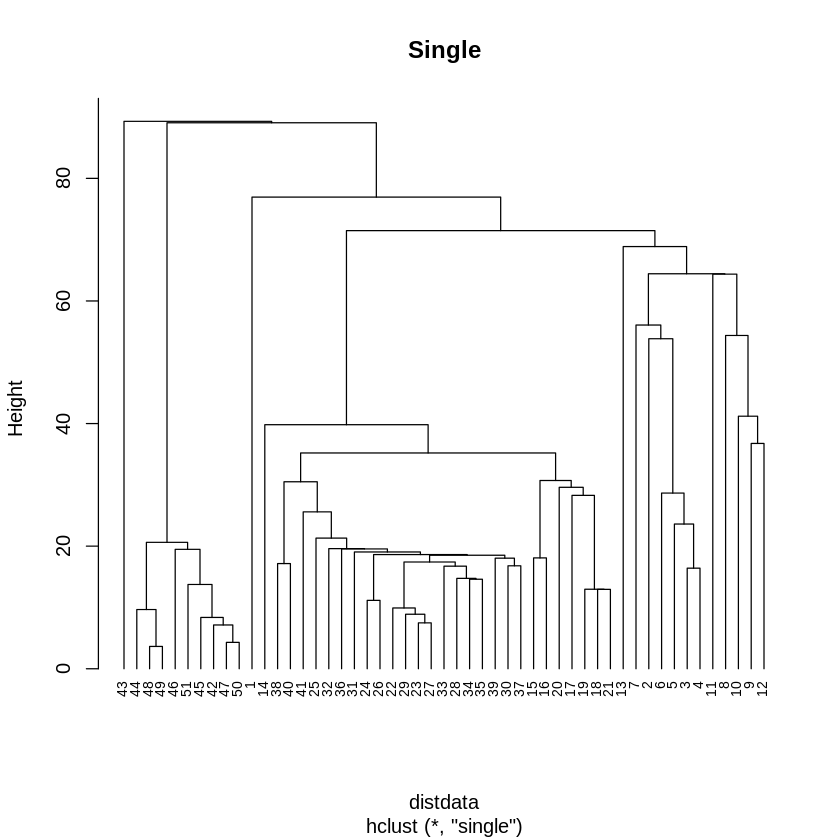

In [6]:
# 단일연결법으로 군집분석
hc_a <- hclust(distdata, method="single")
# 덴드로그램 표시
plot(hc_a, hang=-1, cex=0.7, main="Single")

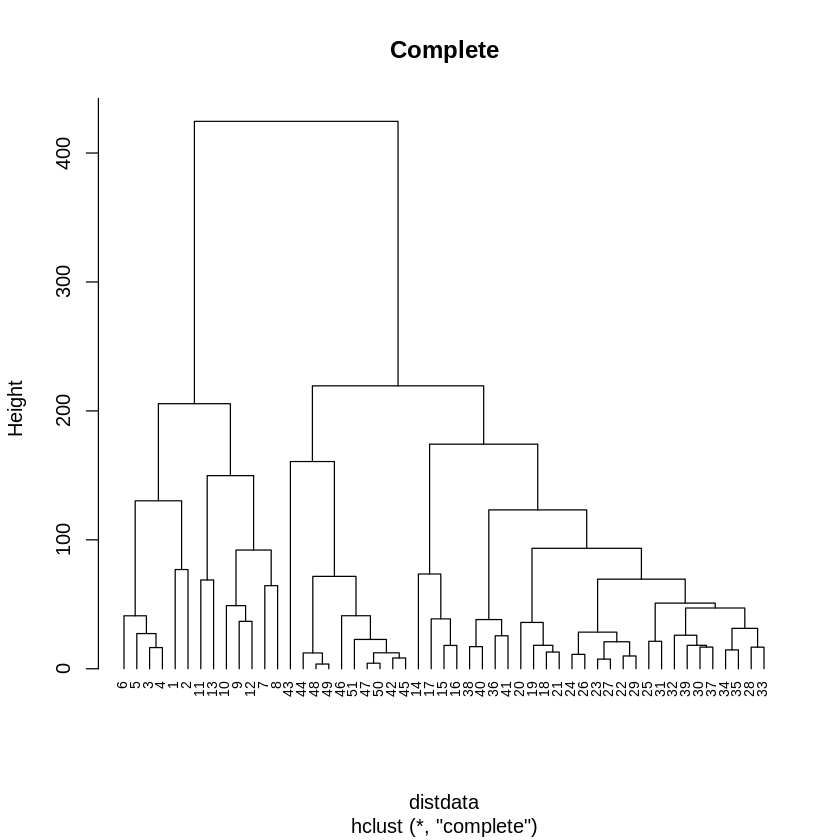

In [7]:
# 완전연결법으로 군집분석
hc_a <- hclust(distdata, method="complete")
# 덴드로그램 표시
plot(hc_a, hang=-1, cex=0.7, main="Complete")

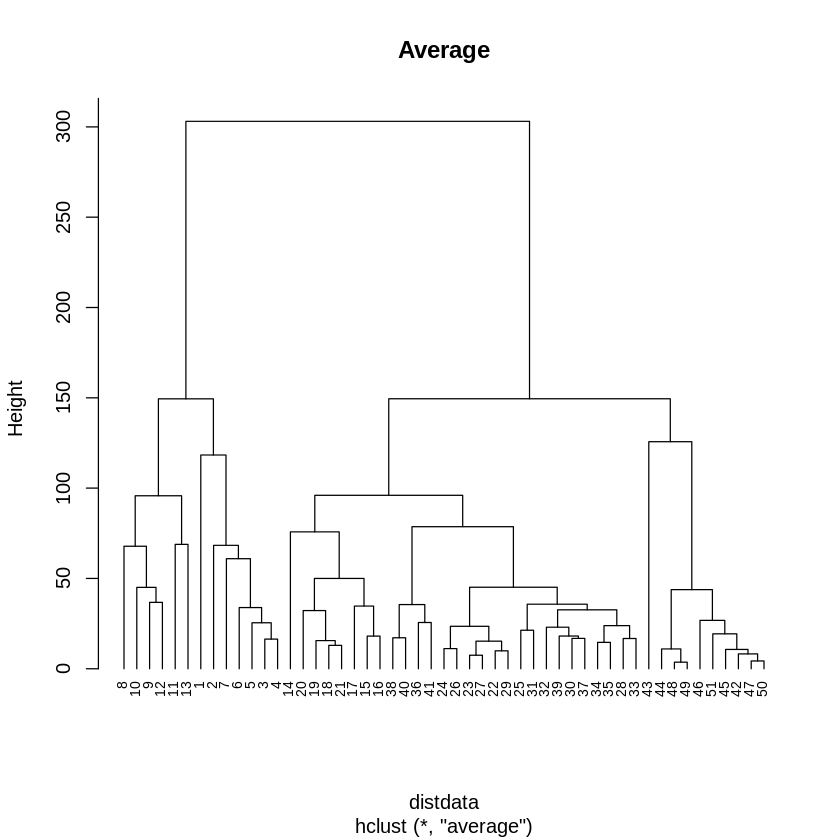

In [8]:
# 평균연결법으로 군집분석
hc_a <- hclust(distdata, method="average")
# 덴드로그램 표시
plot(hc_a, hang=-1, cex=0.7, main="Average")

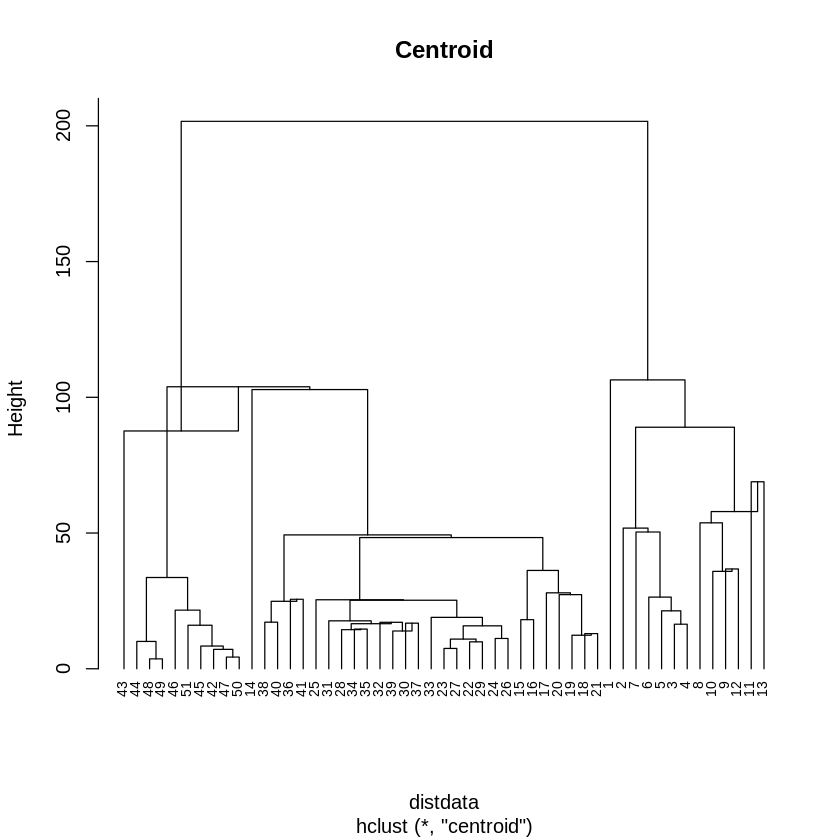

In [9]:
# 중심연결법으로 군집분석
hc_a <- hclust(distdata, method="centroid")
# 덴드로그램 표시
plot(hc_a, hang=-1, cex=0.7, main="Centroid")

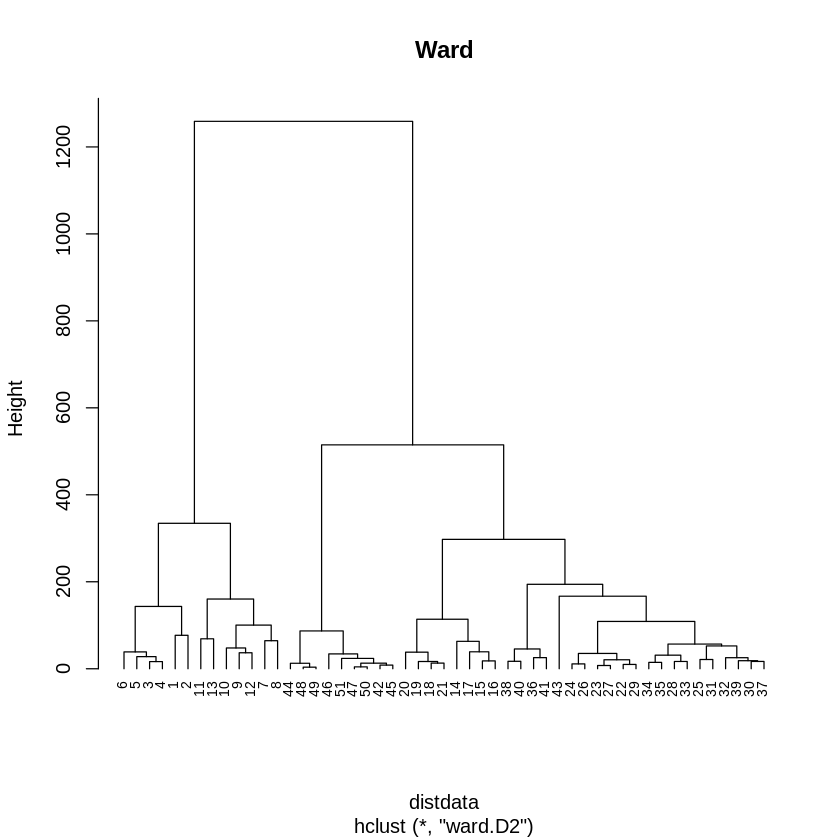

In [10]:
# 워드연결법으로 군집분석
hc_a <- hclust(distdata, method="ward.D2")
# 덴드로그램 표시
plot(hc_a, hang=-1, cex=0.7, main="Ward")

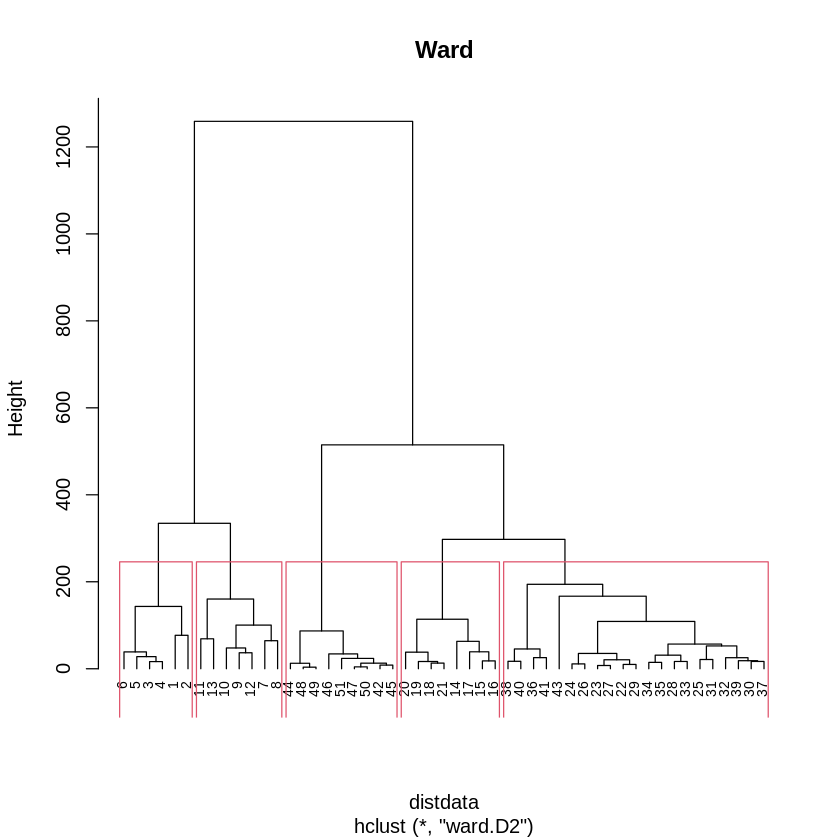

In [14]:
# 워드연결법으로 군집분석
hc_a <- hclust(distdata, method="ward.D2")
plot(hc_a, hang=-1, cex=0.7, main="Ward")
# 분석결과 시각화(군집영역표현)
rect.hclust(hc_a, 5)

k=5 지정하고 5개 군집 표현